In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace =True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first= True)
df = df.astype(int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [11]:
X =df.drop(columns =['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 1)

In [12]:
X_train.shape

(8000, 11)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model  = Sequential()

model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376 (1.47 KB)

 Trainable params: 376 (1.47 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100


I0000 00:00:1724441664.140532      65 service.cc:145] XLA service 0x77fe5c006df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724441664.140599      65 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 96/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.6467

I0000 00:00:1724441665.437368      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7234 - loss: 0.6034 - val_accuracy: 0.7975 - val_loss: 0.4716
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4420 - val_accuracy: 0.7994 - val_loss: 0.4444
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4452 - val_accuracy: 0.8087 - val_loss: 0.4314
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4373 - val_accuracy: 0.8181 - val_loss: 0.4180
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4157 - val_accuracy: 0.8238 - val_loss: 0.3953
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.3751 - val_accuracy: 0.8331 - val_loss: 0.3837
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8349 - loss: 0.3845 - val_accuracy: 0.8419 - val_loss: 0.3718
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.3473 - val_accuracy: 0.8350

In [19]:
model.layers[0].get_weights()

[array([[ 0.0632557 , -0.10154375,  0.07780027,  0.11866622,  0.21873315,
         -0.03671982, -0.10917947,  0.11773048,  0.35776004,  0.04247222,
         -0.6608622 ],
        [ 1.3043748 , -0.41105804,  0.08848421,  0.23330556, -0.4744381 ,
         -0.5016236 , -0.7660346 ,  0.59140885, -0.17882286, -0.27899984,
          0.29935145],
        [ 0.05355789, -0.23042826, -0.21996264, -0.01945281,  0.5215229 ,
          0.323796  ,  0.31402692,  0.0537062 ,  0.13095611, -0.60984087,
         -0.33623222],
        [-0.03640939,  0.08442318,  0.22303553,  0.22687775, -0.5737468 ,
          0.04996475, -0.55352306,  0.04987849, -0.5319385 ,  0.733323  ,
         -0.5805363 ],
        [-0.35217273,  0.39361584, -0.499336  ,  0.6695012 , -0.25539583,
          0.94244975, -0.00949897,  0.68106633, -0.18283719, -0.0329809 ,
         -0.34130323],
        [-0.34674388, -0.6128552 , -0.20542364, -0.35908777, -0.5032717 ,
         -0.5179685 ,  0.5140987 , -0.0446349 , -0.14223059,  0.3987558

In [20]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [21]:
y_pred = np.where(y_log>0.5,1,0)

In [22]:
y_pred.shape

(2000, 1)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8635

In [24]:
import matplotlib.pyplot as plt

history.history

{'accuracy': [0.7776562571525574,
  0.7993749976158142,
  0.8067187666893005,
  0.815625011920929,
  0.8235937356948853,
  0.8348437547683716,
  0.8410937786102295,
  0.8428124785423279,
  0.8453124761581421,
  0.8471875190734863,
  0.8506249785423279,
  0.8529687523841858,
  0.8542187213897705,
  0.856249988079071,
  0.8570312261581421,
  0.859375,
  0.8581249713897705,
  0.8600000143051147,
  0.8607812523841858,
  0.8618749976158142,
  0.8617187738418579,
  0.8618749976158142,
  0.8618749976158142,
  0.862500011920929,
  0.8645312786102295,
  0.8621875047683716,
  0.8657812476158142,
  0.8662499785423279,
  0.8653125166893005,
  0.866406261920929,
  0.8646875023841858,
  0.8662499785423279,
  0.8675000071525574,
  0.8650000095367432,
  0.8670312762260437,
  0.8665624856948853,
  0.8668749928474426,
  0.8667187690734863,
  0.866406261920929,
  0.8681250214576721,
  0.8662499785423279,
  0.867968738079071,
  0.8673437237739563,
  0.8678125143051147,
  0.8665624856948853,
  0.8667187690

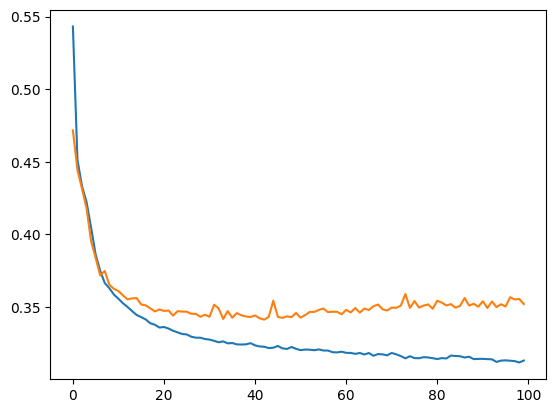

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


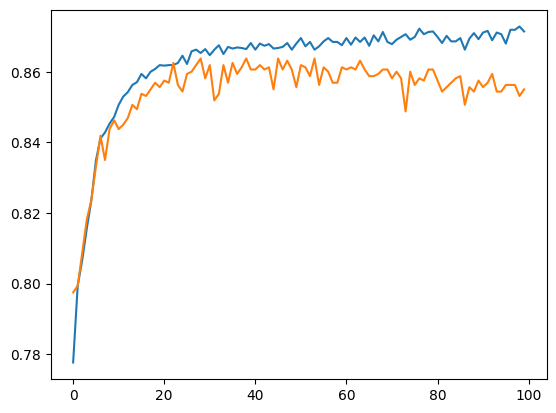

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])